In [6]:
import numpy as np
import pandas as pd
##_____________________________

def get_ds_infos():
    ## 0:Code, 1:Weight, 2:Height, 3:Age, 4:Gender
    dss = np.genfromtxt("motionSense/data_subjects_info.csv",delimiter=',')
    dss = dss[1:]
    print("----> Data subjects information is imported.")
    return dss
##____________

def creat_time_series(num_features, num_act_labels, num_gen_labels, label_codes, trial_codes):
    dataset_columns = num_features+num_act_labels+num_gen_labels
    ds_list = get_ds_infos()
    train_data = np.zeros((0,dataset_columns))
    test_data = np.zeros((0,dataset_columns))
    for i, sub_id in enumerate(ds_list[:,0]):
        for j, act in enumerate(label_codes):
            for trial in trial_codes[act]:
                fname = 'motionSense/A_DeviceMotion_data/A_DeviceMotion_data/'+act+'_'+str(trial)+'/sub_'+str(int(sub_id))+'.csv'
                raw_data = pd.read_csv(fname)
                raw_data = raw_data.drop(['Unnamed: 0'], axis=1)
                unlabel_data = raw_data.values
                label_data = np.zeros((len(unlabel_data), dataset_columns))
                label_data[:,:-(num_act_labels + num_gen_labels)] = unlabel_data
                label_data[:,label_codes[act]] = 1
                label_data[:,-(num_gen_labels)] = int(ds_list[i,4])
                ## We consider long trials as training dataset and short trials as test dataset
                if trial > 10:
                    test_data = np.append(test_data, label_data, axis = 0)
                else:    
                    train_data = np.append(train_data, label_data, axis = 0)
    return train_data , test_data
#________________________________


print("--> Start...")
## Here we set parameter to build labeld time-series from dataset of "(A)DeviceMotion_data"
num_features = 12 # attitude(roll, pitch, yaw); gravity(x, y, z); rotationRate(x, y, z); userAcceleration(x,y,z)
num_act_labels = 6 # dws, ups, wlk, jog, sit, std
num_gen_labels = 1 # 0/1(female/male)
label_codes = {"dws":num_features, "ups":num_features+1, "wlk":num_features+2, "jog":num_features+3, "sit":num_features+4, "std":num_features+5}
trial_codes = {"dws":[1,2,11], "ups":[3,4,12], "wlk":[7,8,15], "jog":[9,16], "sit":[5,13], "std":[6,14]}    
## Calling 'creat_time_series()' to build time-series
print("--> Building Training and Test Datasets...")
train_ts, test_ts = creat_time_series(num_features, num_act_labels, num_gen_labels, label_codes, trial_codes)
print("--> Shape of Training Time-Seires:", train_ts.shape)
print("--> Shape of Test Time-Series:", test_ts.shape)

--> Start...
--> Building Training and Test Datasets...
----> Data subjects information is imported.
--> Shape of Training Time-Seires: (1082373, 19)
--> Shape of Test Time-Series: (331419, 19)


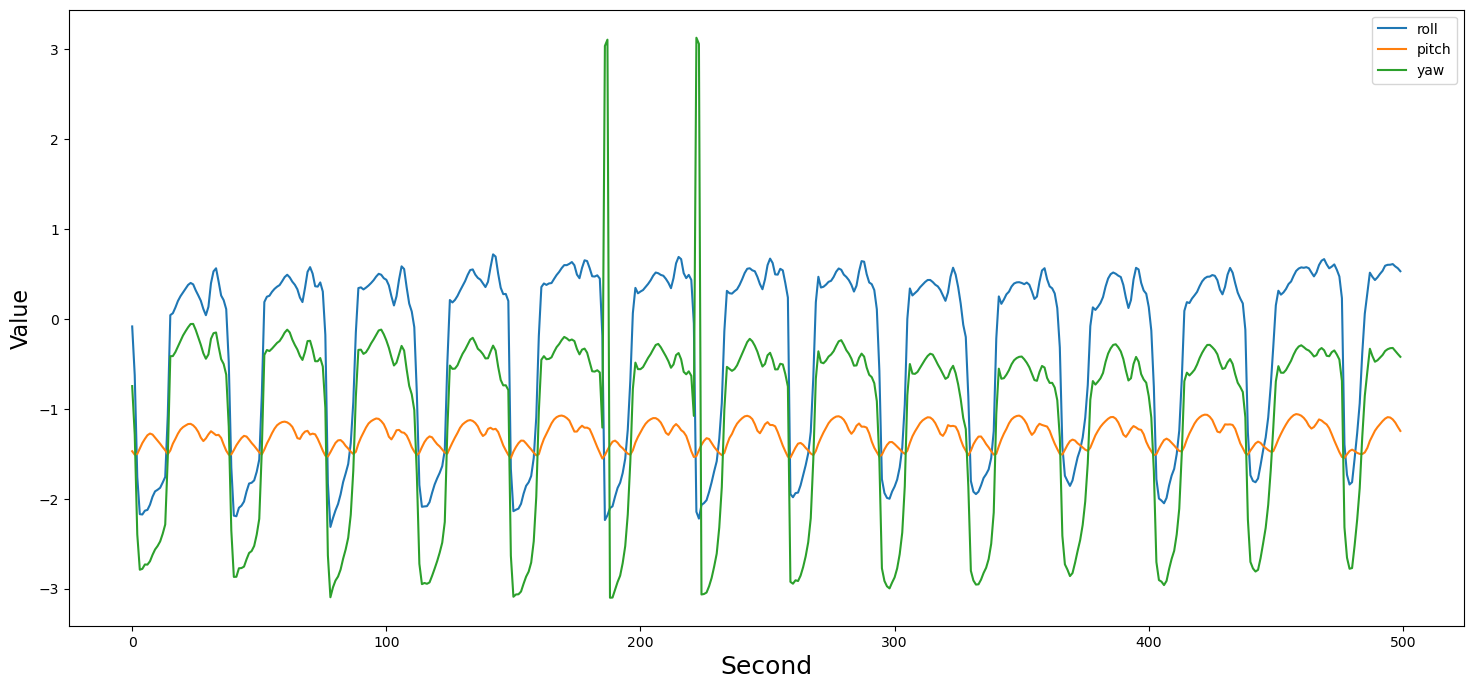

In [8]:
from pandas import Series
import matplotlib.pylab as plt
import matplotlib.pyplot as pyplt
##________________________________
## For Example: Attiude data
## female
data = train_ts[train_ts[:,-1]==0]
## jogging
data = data[data[:,-4]==1]
## 10 seconds
data = pd.DataFrame(data[10000:10500,0:3])
data.plot()
plt.xlabel('Second', fontsize=18)
plt.ylabel('Value', fontsize=16)
lgnd=plt.legend()
lgnd.get_texts()[0].set_text('roll')
lgnd.get_texts()[1].set_text('pitch')
lgnd.get_texts()[2].set_text('yaw')
fig = pyplt.gcf()
fig.set_size_inches(18, 8)
plt.show()

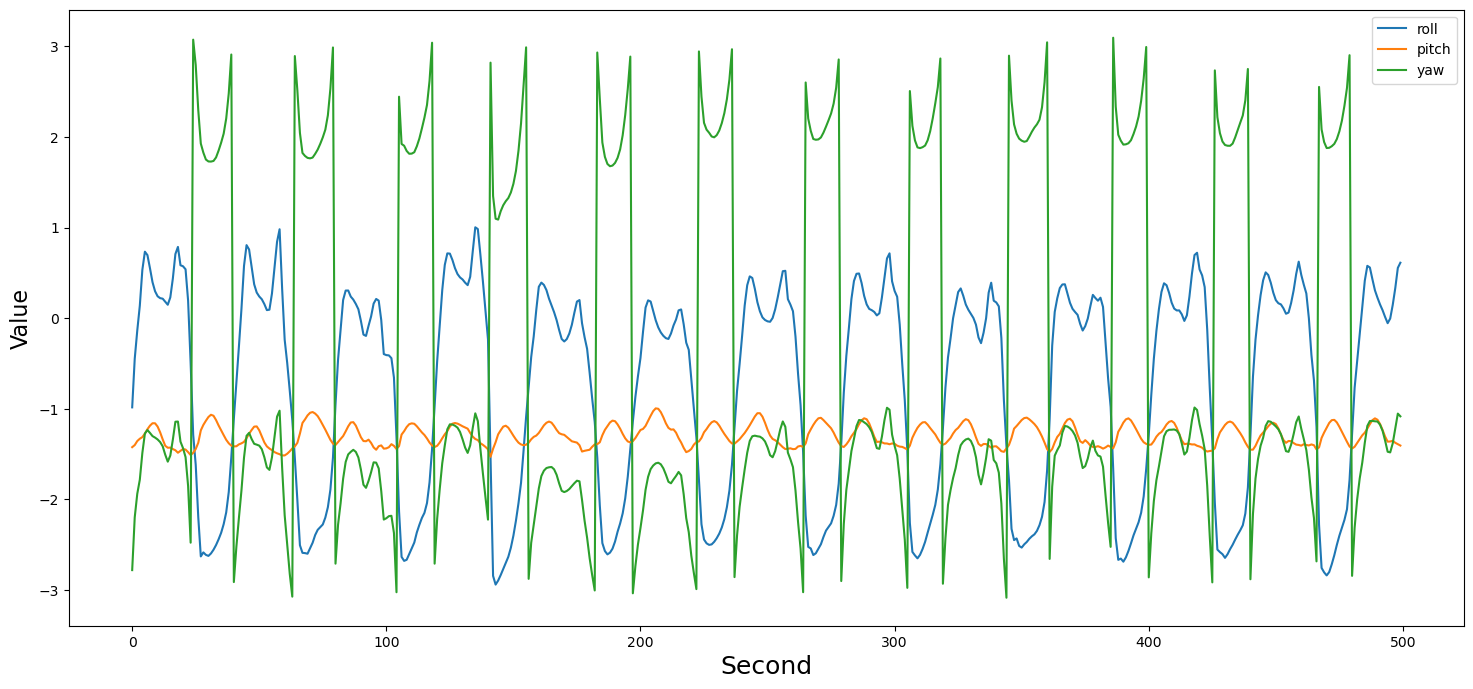

In [9]:
## For Example: Attiude data
## male
data = train_ts[train_ts[:,-1]==1]
## jogging
data = data[data[:,-4]==1]
## 10 seconds
data = pd.DataFrame(data[10000:10500,0:3])
data.plot()
plt.xlabel('Second', fontsize=18)
plt.ylabel('Value', fontsize=16)
lgnd=plt.legend()
lgnd.get_texts()[0].set_text('roll')
lgnd.get_texts()[1].set_text('pitch')
lgnd.get_texts()[2].set_text('yaw')
fig = pyplt.gcf()
fig.set_size_inches(18, 8)
plt.show()

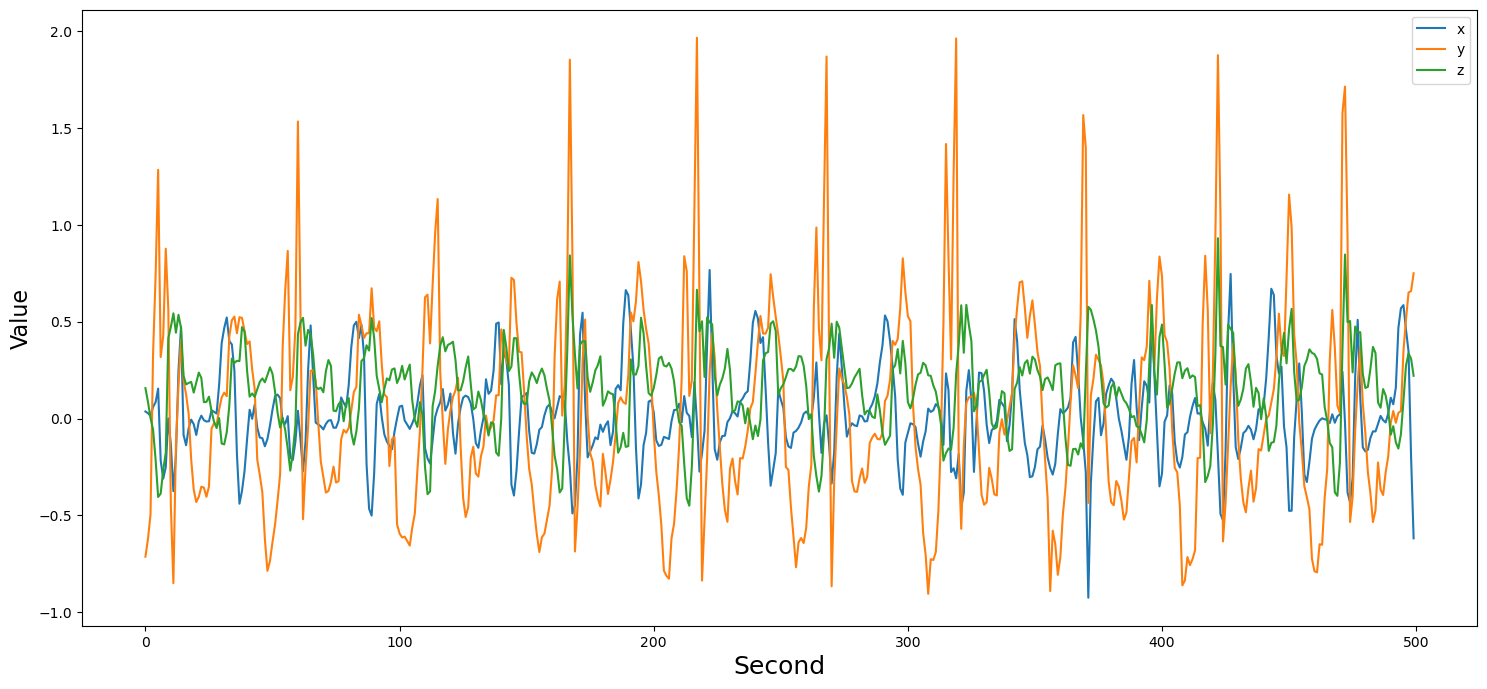

In [10]:
## For Example: Acceleration data
## female
data = train_ts[train_ts[:,-1]==0]
## walking
data = data[data[:,-5]==1]
data = pd.DataFrame(data[10000:10500,9:12])
data.plot()
plt.xlabel('Second', fontsize=18)
plt.ylabel('Value', fontsize=16)
lgnd=plt.legend()
lgnd.get_texts()[0].set_text('x')
lgnd.get_texts()[1].set_text('y')
lgnd.get_texts()[2].set_text('z')
fig = pyplt.gcf()
fig.set_size_inches(18, 8)
plt.show()

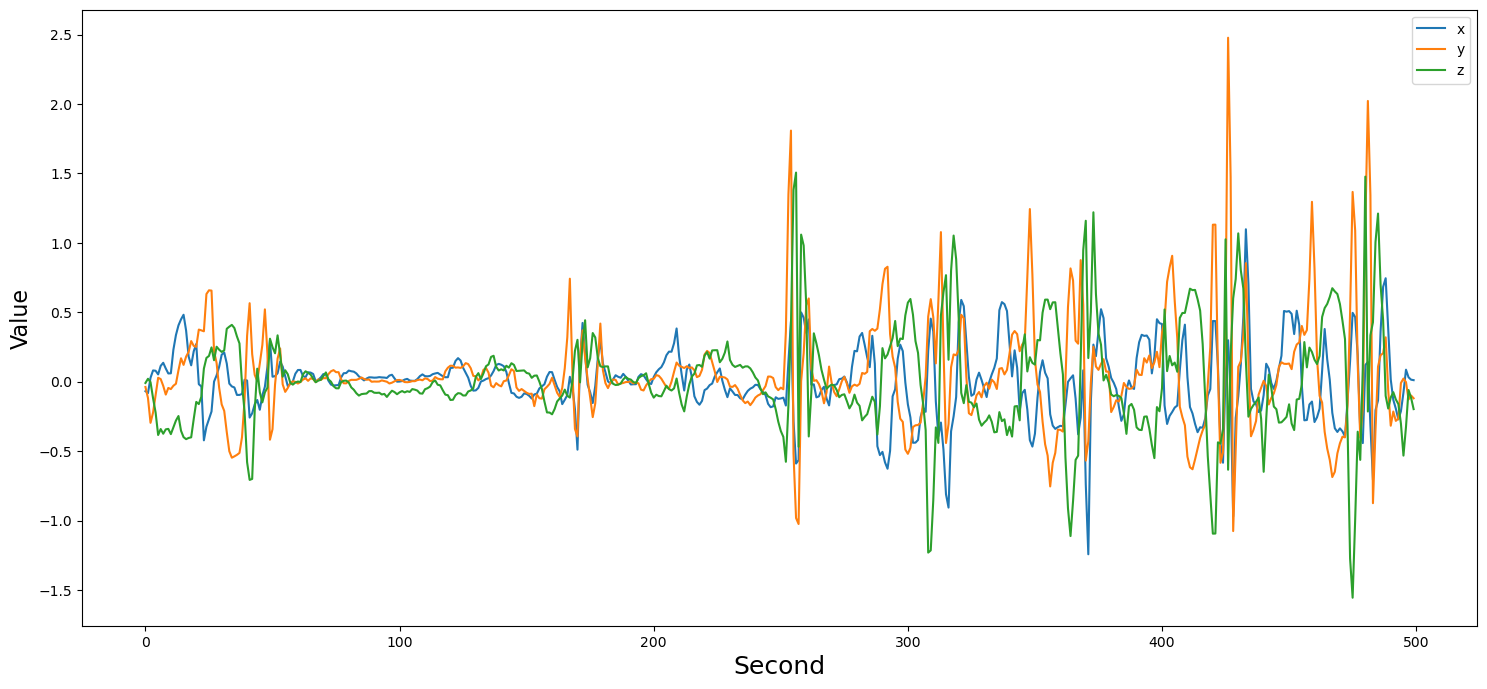

In [11]:
## For Example: Acceleration data
## male
data = train_ts[train_ts[:,-1]==1]
## walking
data = data[data[:,-5]==1]
data = pd.DataFrame(data[10000:10500,9:12])
data.plot()
plt.xlabel('Second', fontsize=18)
plt.ylabel('Value', fontsize=16)
lgnd=plt.legend()
lgnd.get_texts()[0].set_text('x')
lgnd.get_texts()[1].set_text('y')
lgnd.get_texts()[2].set_text('z')
fig = pyplt.gcf()
fig.set_size_inches(18, 8)
plt.show()